## The dataset contains sales data for a clothing store that sells cloths across various online platforms.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [15]:
df = pd.read_excel('Store Sale Data.xlsx')
df.head(8)

,index,Order ID,Cust ID,Gender,Age,Date,Month,Status,Platform,Category,Size,Amount,ship-city,ship-state
0,9913,404-2354738-3233942,2354738,Women,67.0,2022-01-04,Jan,Delivered,Meesho,kurta,S,NaN,MUMBAI,MAHARASHTRA
1,9914,403-4459077-2255503,4459077,Women,NaN,2022-01-04,Jan,Delivered,Nalli,Set,XL,788.0,KALYAN,MAHARASHTRA
2,9915,403-4459077-2255503,4459077,Women,52.0,2022-01-04,Jan,Delivered,Amazon,kurta,S,362.0,HYDERABAD,TELANGANA
3,9916,403-4459077-2255503,4459077,Women,45.0,2022-01-04,Jan,Delivered,Myntra,Settt,XXL,NaN,VISAKHAPATNAM,ANDHRA PRADESH
4,9917,403-0387488-1209953,387488,Women,33.0,2022-01-04,Jan,Delivered,Flipkart,Settt,3XL,696.0,NAVI MUMBAI,MAHARASHTRA
5,9918,403-0387488-1209953,387488,Women,NaN,2022-01-04,Jan,Delivered,Myntra,Set,S,432.0,CHENNAI,TAMIL NADU
6,9919,403-0387488-1209953,387488,Men,46.0,2022-01-04,Jan,Delivered,Myntra,Set,XS,597.0,PUNE,MAHARASHTRA
7,9920,171-6657720-2910751,6657720,Women,43.0,2022-01-04,Jan,Delivered,Myntra,kurta,S,487.0,KANPUR,UTTAR PRADESH


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       31047 non-null  int64         
 1   Order ID    31047 non-null  object        
 2   Cust ID     31047 non-null  int64         
 3   Gender      31047 non-null  object        
 4   Age         31043 non-null  float64       
 5   Date        31047 non-null  datetime64[ns]
 6   Month       31047 non-null  object        
 7   Status      31047 non-null  object        
 8   Platform    31047 non-null  object        
 9   Category    31047 non-null  object        
 10  Size        31047 non-null  object        
 11  Amount      31044 non-null  float64       
 12  ship-city   31047 non-null  object        
 13  ship-state  31047 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 3.3+ MB


### In this we can see we have 3 null value in Age and 3 null value in  Amount column. To solve null value issue we can either insert value or remove the row that have null value.

In [19]:
# here we are useing dropna to drop row with null value in amount column
df = df.dropna(subset=['Amount'])

In [21]:
# here we are using mean to insert value in Age column where it has null value
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age).astype(int)

In [23]:
# drop size column
df.drop(columns=['Size'], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31044 entries, 1 to 31046
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       31044 non-null  int64         
 1   Order ID    31044 non-null  object        
 2   Cust ID     31044 non-null  int64         
 3   Gender      31044 non-null  object        
 4   Age         31044 non-null  int32         
 5   Date        31044 non-null  datetime64[ns]
 6   Month       31044 non-null  object        
 7   Status      31044 non-null  object        
 8   Platform    31044 non-null  object        
 9   Category    31044 non-null  object        
 10  Amount      31044 non-null  float64       
 11  ship-city   31044 non-null  object        
 12  ship-state  31044 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(8)
memory usage: 3.2+ MB


In [27]:
# Check for unique values in the Category column to see spelling mistake
print(df['Category'].unique())

['Set' 'kurta' 'Settt' 'Top' 'Western Dress' 'Ethnic Dress' 'Saree'
 'Blouse' 'Bottom']


### we find 'Settt' which is 'Set' written wrong. 

In [23]:
# we will replace 'Settt' with 'Set'. 
df['Category'] = df['Category'].replace({'Settt': 'Set'})

In [26]:
# rename column. we can use in place to make change permanent.
df.rename(columns={'Gender':'Sex'})

,index,Order ID,Cust ID,Sex,Age,Date,Month,Status,Platform,Category,Size,Amount,ship-city,ship-state
0,9913,404-2354738-3233942,2354738,Women,67.0,2022-01-04,Jan,Delivered,Meesho,kurta,S,NaN,MUMBAI,MAHARASHTRA
1,9914,403-4459077-2255503,4459077,Women,NaN,2022-01-04,Jan,Delivered,Nalli,Set,XL,788.0,KALYAN,MAHARASHTRA
2,9915,403-4459077-2255503,4459077,Women,52.0,2022-01-04,Jan,Delivered,Amazon,kurta,S,362.0,HYDERABAD,TELANGANA
3,9916,403-4459077-2255503,4459077,Women,45.0,2022-01-04,Jan,Delivered,Myntra,Set,XXL,NaN,VISAKHAPATNAM,ANDHRA PRADESH
4,9917,403-0387488-1209953,387488,Women,33.0,2022-01-04,Jan,Delivered,Flipkart,Set,3XL,696.0,NAVI MUMBAI,MAHARASHTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31042,22461,171-0107864-0451508,107864,Women,37.0,2022-12-06,Dec,Delivered,Flipkart,kurta,S,432.0,GREATER NOIDA,UTTAR PRADESH
31043,22462,402-4584926-6662760,4584926,Women,33.0,2022-12-06,Dec,Delivered,Ajio,Top,M,513.0,BILASPUR,HARYANA
31044,22463,171-8969189-9407563,8969189,Women,23.0,2022-12-06,Dec,Delivered,Amazon,kurta,XS,376.0,MUDBIDRI,KARNATAKA
31045,22464,402-8980387-5965930,8980387,Women,37.0,2022-12-06,Dec,Delivered,Myntra,Set,M,1432.0,NAVI MUMBAI,MAHARASHTRA


In [33]:
df.describe()

,index,Cust ID,Age,Date,Amount
count,31044.000000,3.104400e+04,31044.000000,31044,31044.000000
mean,15524.541779,4.936764e+06,39.494910,2022-06-15 07:04:14.657904896,682.039911
min,1.000000,8.950000e+02,18.000000,2022-01-04 00:00:00,229.000000
25%,7761.750000,2.416540e+06,28.000000,2022-03-06 00:00:00,486.000000
50%,15525.500000,4.909992e+06,37.000000,2022-06-06 00:00:00,646.000000
75%,23286.250000,7.454179e+06,47.000000,2022-09-06 00:00:00,794.000000
max,31047.000000,9.999233e+06,78.000000,2022-12-06 00:00:00,3036.000000
std,8962.904842,2.900645e+06,15.115348,NaN,268.559457


# Exploratory Data Analysis

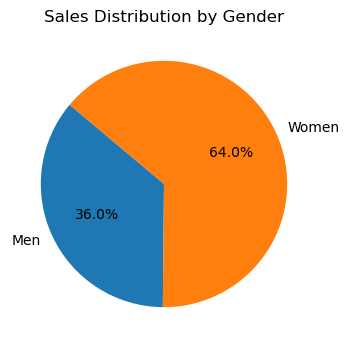

In [39]:
# Group the data by Gender and sum the sales amount
sales_by_gender = df.groupby('Gender')['Amount'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_gender, labels=sales_by_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Gender')
plt.show()

#### Women make more purchase than Men

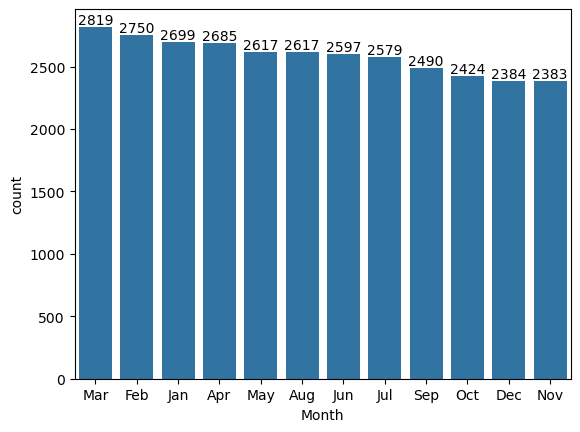

In [53]:
# Sales on Month basic in descending order
month_order = df['Month'].value_counts().index
a = sb.countplot(x='Month', data=df, order=month_order)
for bars in a.containers:
    a.bar_label(bars)

#### Jan, Feb and March month has most sales

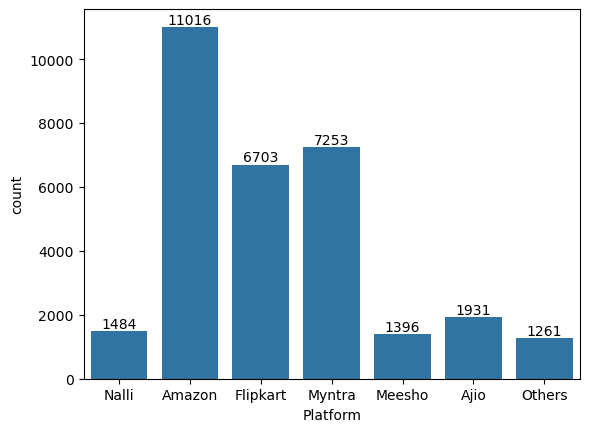

In [97]:
# sales based on platform
a = sb.countplot(data = df, x = 'Platform')
for bars in a.containers:
    a.bar_label(bars)

#### The majority of sales occur on the Amazon, Flipkart and Myntra platforms.

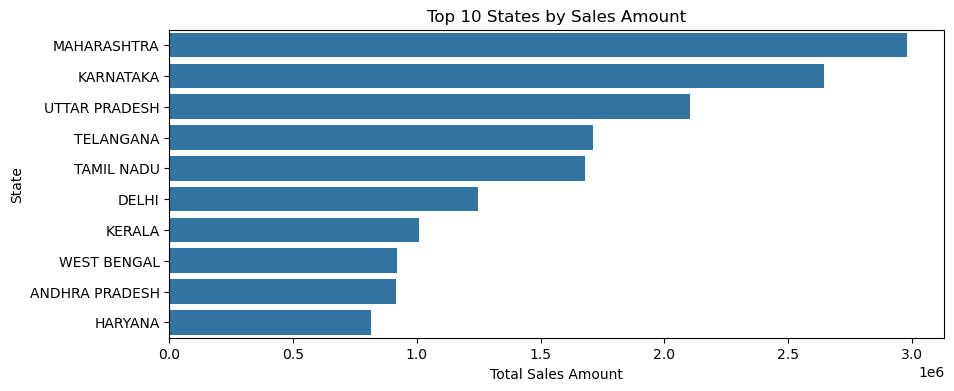

In [70]:
# top 10 states by Sale Amount
plt.figure(figsize=(10, 4))
sb.barplot(x='Amount', y='ship-state', data=top_10_states)
plt.xlabel('Total Sales Amount')
plt.ylabel('State')
plt.title('Top 10 States by Sales Amount')
plt.show()

#### Maharashtra, Karnataka, Uttar Pradesh, Telangana and Tamil Nadu generate the highest revenue.

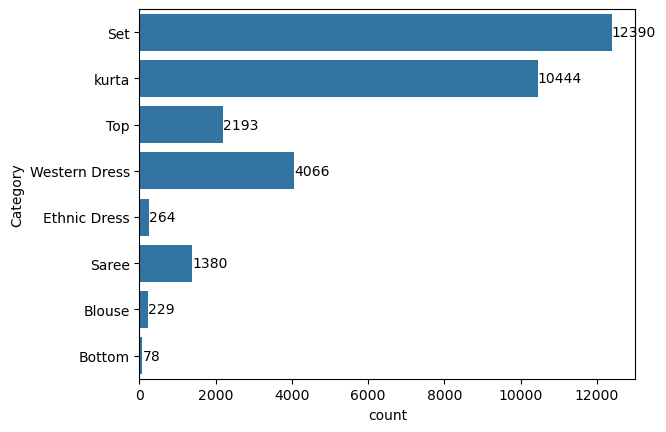

In [143]:
# sales based on platform
a = sb.countplot(data = df, y = 'Category')
for bars in a.containers:
    a.bar_label(bars)

#### Set, kurtas and western dresses are the most sold products.

# Insights:

1. Women make the most purchases.
2. Maharashtra, Karnataka, Uttar Pradesh, Telangana and Tamil Nadu generate the highest revenue.
3. The majority of sales occur on the Amazon, Flipkart and Myntra platforms.
4. Most sales happen in the months of January, February and March.
5. Set, kurtas and western dresses are the most sold products.

# Conclusion:

## Focus on women’s clothing, particularly kurtas, set and western dresses, primarily on Amazon, Flipkart and Myntra during the months of January, February and March. Target customers in Maharashtra, Karnataka, Uttar Pradesh, Telangana, and Tamil Nadu.